In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Download the dataset insurance.csv on your Google Drive

from google.colab import drive
drive.mount("/content/drive")
data = pd.read_csv(r"/content/drive/MyDrive/insurance.csv")
data

Mounted at /content/drive


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


1.   age - возвраст
2.   sex - пол
3.   bmi - индекс  массы тела
4.   children - количество детей
5.   smoker - курит ли человек
6.   region - регион
7.   charges - страховые выплаты

Проверяем типы колонок.

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Смотрим, есть ли нулевые значения.

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Смотрим, какие значения могут принимать колонки класса object.

In [ ]:
data.sex.unique()

array(['female', 'male'], dtype=object)

In [ ]:
data.smoker.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data = data.replace(to_replace = ["yes", "no"], value=[True, False])

In [ ]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

Проверяем выборку на выбросы.

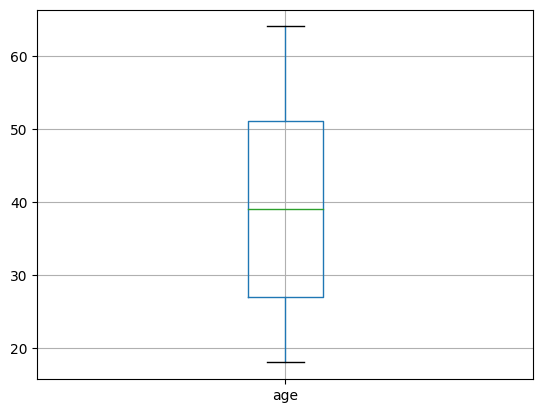

In [ ]:
data["age"].to_frame().boxplot();

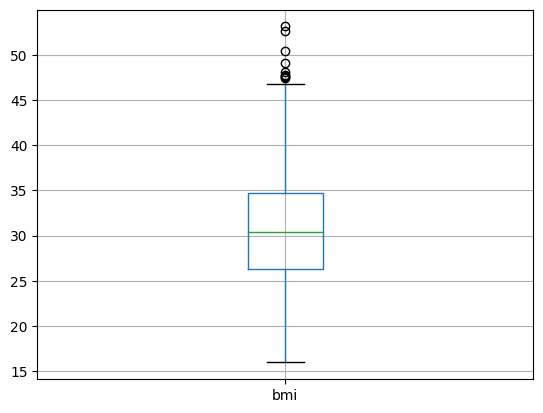

In [ ]:
data["bmi"].to_frame().boxplot();

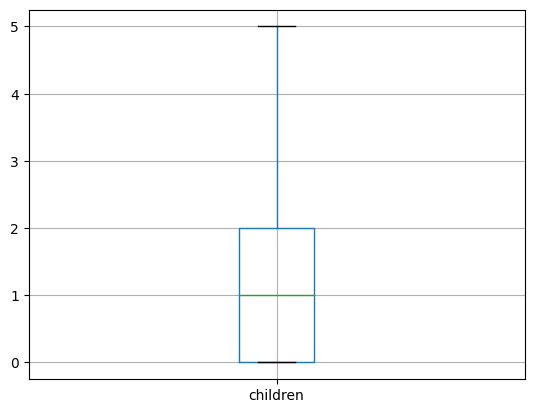

In [ ]:
data["children"].to_frame().boxplot();

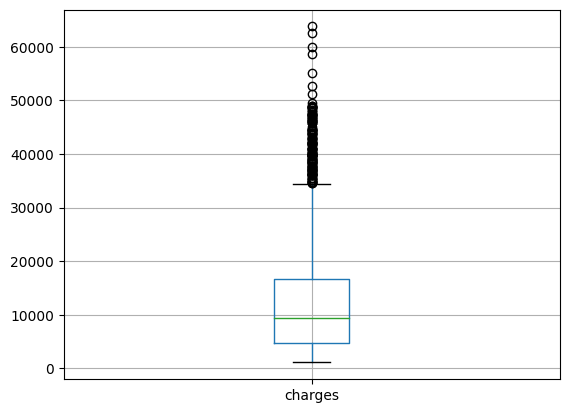

In [ ]:
data["charges"].to_frame().boxplot();

Имеем выбросы по индексу массы тела и страховой выплате.

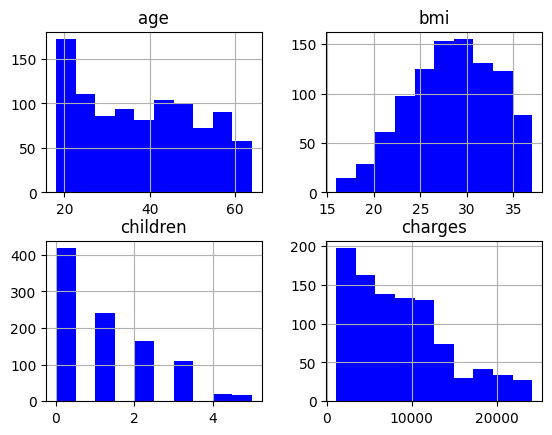

In [ ]:
data.hist(color="blue");

In [ ]:
data = data[data["bmi"] <= np.quantile(data["bmi"], 0.85)]
data = data[data["charges"] <= np.quantile(data["charges"], 0.85)]

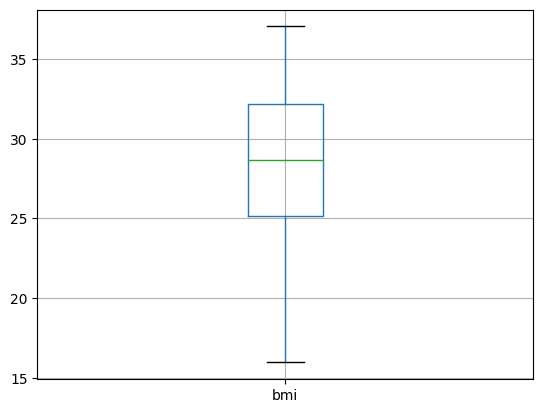

In [ ]:
data["bmi"].to_frame().boxplot();

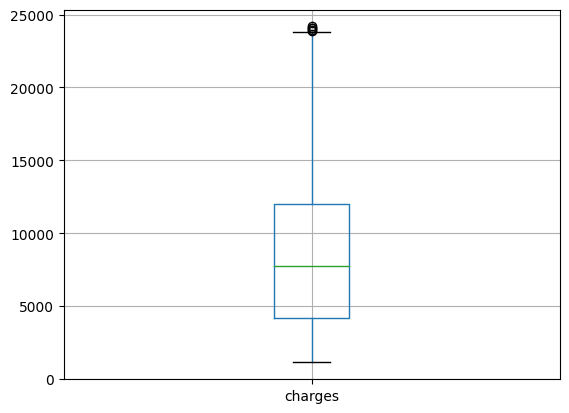

In [ ]:
data["charges"].to_frame().boxplot();

Наконец - то избавились от выбросов!

Проверка на минимальные и максимальные значения:

In [ ]:
for col in data.columns:
    print(col, min(data[col]), max(data[col]))

age 18 64
sex female male
bmi 15.96 37.05
children 0 5
smoker False True
region northeast southwest
charges 1121.8739 24180.9335


*Теперь с данными все хорошо!*

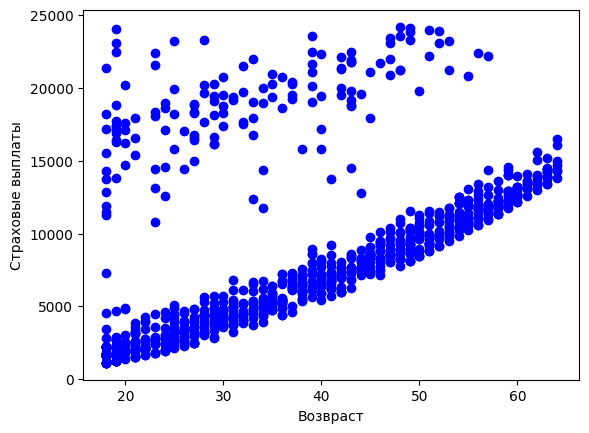

In [ ]:
plt.scatter(data["age"], data["charges"], color="blue")
plt.xlabel("Возвраст")
plt.ylabel("Страховые выплаты")
plt.show()

Чем старше, тем больше платишь.

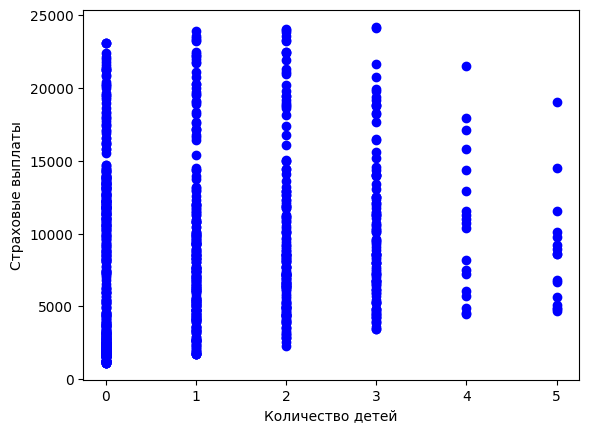

In [ ]:
plt.scatter(data["children"], data["charges"], color="blue")
plt.xlabel("Количество детей")
plt.ylabel("Страховые выплаты")
plt.show()

Видим, что страховые выплаты почти никак не зависят от количества детей.

In [ ]:
data[data["smoker"] == True].charges.mean()

19123.591307878785

In [ ]:
data[data["smoker"] == False].charges.mean()

7569.902728410817

In [ ]:
data[data["smoker"] == True].charges.mean() - data[data["smoker"] == False].charges.mean()

11553.68857946797

Видим, что в целом курильщки платят на 11,5 тысяч больше.

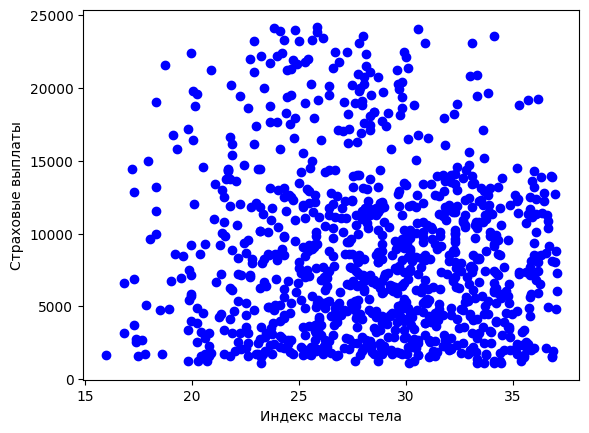

In [ ]:
plt.scatter(data["bmi"], data["charges"], color="blue")
plt.xlabel("Индекс массы тела")
plt.ylabel("Страховые выплаты")
plt.show()

 Видим, что индекс массы тела не имеет значения.

In [ ]:
data[data["sex"] == "female"].charges.mean()

8998.92188174849

In [ ]:
data[data["sex"] == "male"].charges.mean()

8490.481603481952

Видим, что в целом женщины платят на 0,5 тысяч больше.

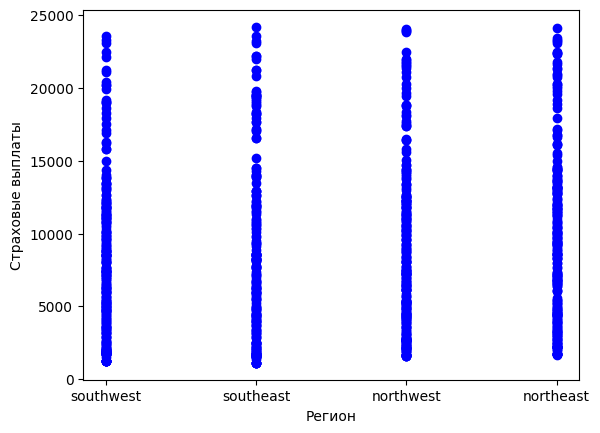

In [ ]:
plt.scatter(data["region"], data["charges"], color="blue")
plt.xlabel("Регион")
plt.ylabel("Страховые выплаты")
plt.show()

Все регионы платят примерно одинаково.

In [ ]:
_regions = list(data["region"])
_smokers = list(data["smoker"])
sum_smoker_count = 0
sum_sum_count = 0
for i in range(len(set(_regions))):
    smoker_count = 0
    sum_count = 0
    region = list(set(_regions))[i]
    for i in range(len(_regions)):
        if _regions[i] == region and _smokers[i]:
            smoker_count += 1
            sum_count += 1
        elif _regions[i] == region:
          sum_count += 1
    sum_smoker_count += smoker_count
    sum_sum_count += sum_count
    print(region)
    print(f"Курильщиков: {smoker_count / sum_count * 100}%")
    print(f"Не курящих: {100 - (smoker_count / sum_count * 100)}%")
print(f"Всего курильщиков: {sum_smoker_count / sum_sum_count * 100}%")
print(f"Всего не курящих: {100 - sum_smoker_count / sum_sum_count * 100}%")

northeast
Курильщиков: 12.048192771084338%
Не курящих: 87.95180722891567%
southeast
Курильщиков: 11.961722488038278%
Не курящих: 88.03827751196172%
southwest
Курильщиков: 8.23045267489712%
Не курящих: 91.76954732510288%
northwest
Курильщиков: 8.98876404494382%
Не курящих: 91.01123595505618%
Всего курильщиков: 10.227272727272728%
Всего не курящих: 89.77272727272727%


В целом в выборке около 10% курильщиков, притом на севере их немного больше.

Выводы:

*   Чем больше возвраст, тем больше страховые выплаты
*   Страховые выплаты почти не зависят от количества детей
*   В целом курильщики платят страховые выплаты большие, чем не курящие на 11500
*   Страховые выплаты не зависят от индекса массы тела
*   В целом женщины платят на 500 больше
*   Страховые выплаты не зависят от региона
*   В целом в регионах одинаковы процент курильщиков, но на севере курят больше





